In [ ]:
from PyParticle.population import build_population
import numpy as np 
# fixed_RI = [1.75, 0.44]
fixed_RI = 1.55 + 0.0j
pop_cfg_50nm = {
    "type": "binned_lognormals",
    "N": [1e7],
    #"N_units": "m-3",
    "GMD": [50e-9],
    #"GMD_units": "m",
    "GSD": [1.6],
    "aero_spec_names": [["SO4"]],
    "aero_spec_fracs": [[1.0]],
    "N_bins": 1000,
    "D_min": 1e-10,
    "D_max": 1e-4,
    #"refractive_index": fixed_RI,
    'species_modifications': {'n_550': np.real(fixed_RI), 'k_550': 0.0, 'alpha_n': 0.0, 'alpha_k': 0.0}
  }
pop_cfg_100nm = pop_cfg_50nm.copy()
pop_cfg_100nm["GMD"] = [100e-9]

pop_cfg_200nm = pop_cfg_50nm.copy()
pop_cfg_200nm["GMD"] = [200e-9]

pop_configs = [pop_cfg_50nm, pop_cfg_100nm, pop_cfg_200nm]
pop_50nm = build_population(pop_cfg_50nm)
pop_100nm = build_population(pop_cfg_100nm)
pop_200nm = build_population(pop_cfg_200nm)

series = [
    {"key": "50", "population": pop_50nm, "label": "$\mu=50$ nm"},
    {"key": "100", "population": pop_100nm, "label": "$\mu=250$ nm"},
    {"key": "200", "population": pop_200nm, "label": "$\mu=250$ nm"},
]
# Lines

from PyParticle.viz.style import StyleManager, Theme
from PyParticle.viz.builder import build_plotter
mgr = StyleManager(Theme(), deterministic=True)
line_styles = mgr.plan("line", [s["key"] for s in series])

/Users/fier887/Library/CloudStorage/OneDrive-PNNL/Code/PyParticle/src/PyParticle/aerosol_particle.py:261: UserWarning: Surface tension not implemented; returning default 0.072 N/m
  warnings.warn("Surface tension not implemented; returning default 0.072 N/m", UserWarning)


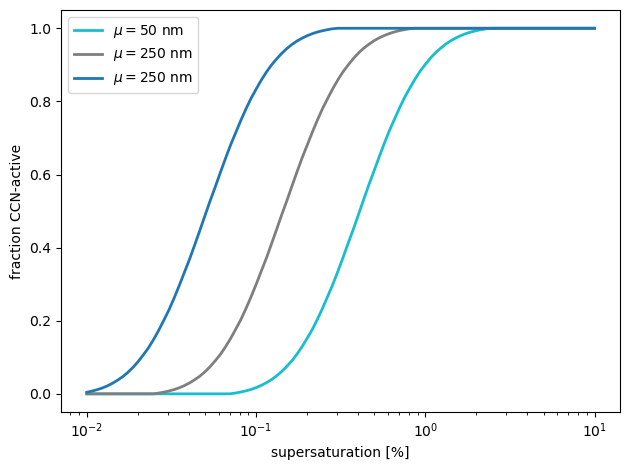

In [2]:
import matplotlib.pyplot as plt
# import numpy as np
# series = [
#     {"key": "50", "population": pop_50nm, "label": "$\mu=50$ nm"},
#     {"key": "250", "population": pop_250nm, "label": "$\mu=250$ nm"},
# ]




fig, ax = plt.subplots()
for s in series:
    cfg = {
        # "varname": "b_scat",
        # # "var_cfg": {"wvl_grid": [550e-9], "rh_grid": np.linspace(0.,100.,21)},  # simple case: single x
        # "var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
        # "style": line_styles[s["key"]],

        "varname": "frac_ccn",
        # "var_cfg": {"wvl_grid": [550e-9], "rh_grid": np.linspace(0.,100.,21)},  # simple case: single x
        #"var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
        "style": line_styles[s["key"]],
    }
    plotter = build_plotter("state_line", cfg)
    plotter.plot(s["population"], ax, label=s["label"])
ax.legend(); fig.tight_layout()

NotImplementedError: PyMieScatt comparison currently only supports single-species populations.

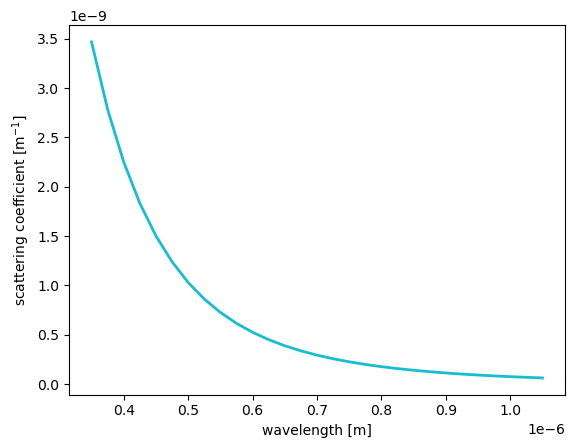

In [3]:
from helpers.pymiescatt_comparison import pymiescatt_lognormal_optics
fig, ax = plt.subplots()
for (s,pop_cfg) in zip(series,pop_configs):
    cfg = {
        "varname": "b_scat",
        "var_cfg": {"morphology":"homogeneous","wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.], 'refractive_index': fixed_RI},  # simple case: single x
        "style": line_styles[s["key"]],
    }
    plotter = build_plotter("state_line", cfg)
    plotter.plot(s["population"], ax, label=s["label"])
    
    wvl_nm, b_scat_m, b_abs_m = pymiescatt_lognormal_optics(pop_cfg, cfg.get('var_cfg'))
    plt.plot(wvl_nm*1e-9, b_scat_m, color=line_styles[s['key']]['color'], linestyle='--', label='PyMieScatt')

ax.set_yscale('log')
ax.legend(); fig.tight_layout()
